# Car Sales Analysis

This analysis explores car sales trends, customer demographics, dealer performance, and vehicle preferences across 2022 and 2023. The goal is to uncover insights that can drive business strategies, optimize marketing efforts, and improve decision-making for dealerships and manufacturers.


The analysis is structured into the following key sections:

- Sales Performance Analysis - Examines total sales volume, revenue trends, and year-over-year (YoY) growth.

- Customer Demographics & Buying Behavior - Explores gender-based purchasing patterns, income-based preferences, and top customer segments.

- Dealer & Regional Performance - Identifies top-performing dealerships and high-demand regions.

- Car Model & Brand Performance - Highlights best-selling models, most preferred brands, and pricing trends.

- Car Preferences & Features - Analyzes transmission, body style, engine type, and color preferences among buyers.

In [1]:
# %pip install pandas
# %pip install plotly
# %pip install matploblib
# %pip install seaborn
# %pip install ipykernel
# %pip install --upgrade nbformat


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

In [3]:
df = pd.read_csv("car sales.csv", encoding="utf-8")
df.columns = [x.lower()  for x in df.columns]
df.head()

,car_id,date,customer name,gender,annual income,dealer_name,company,model,engine,transmission,color,price ($),dealer_no,body style,phone,dealer_region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_id         23906 non-null  object
 1   date           23906 non-null  object
 2   customer name  23905 non-null  object
 3   gender         23906 non-null  object
 4   annual income  23906 non-null  int64 
 5   dealer_name    23906 non-null  object
 6   company        23906 non-null  object
 7   model          23906 non-null  object
 8   engine         23906 non-null  object
 9   transmission   23906 non-null  object
 10  color          23906 non-null  object
 11  price ($)      23906 non-null  int64 
 12  dealer_no      23906 non-null  object
 13  body style     23906 non-null  object
 14  phone          23906 non-null  int64 
 15  dealer_region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

df = df.replace("DoubleÂ\xa0Overhead Camshaft", "Double Overhead Camshaft")

df.drop(columns=["customer name", "dealer_no ", "phone"], axis=1, inplace=True)

# Convert numerical month values to their names
df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])

,car_id,date,customer name,gender,annual income,dealer_name,company,model,engine,transmission,color,price ($),dealer_no,body style,phone,dealer_region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


<Axes: >

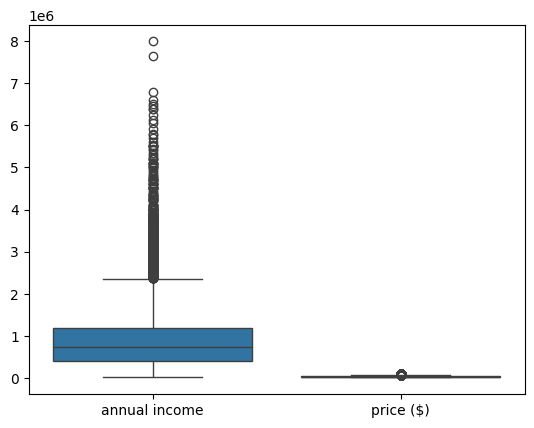

In [107]:
df_box = df[["annual income", "price ($)"]]
plt.figure()
sns.boxplot(df_box)

In [ ]:
df['annual income'].max()

df.drop(df.index[(df["annual income"] == 11200000)],axis=0,inplace=True)

### EDA

In [ ]:
categorical_cols = ['gender', 'company', 'model', 'engine', 'transmission', 'color', 'body style', 'dealer_region']
for col in categorical_cols:
    plt.figure(figsize=(16,6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Analysis & Insights

### 1. Sales Performance Analysis

#### Total Number of Cars Sold Per Year
The analysis shows an increase in total car sales from 10,645 units in 2022 to 13,261 units in 2023, marking a 24.57% growth in sales volume year-over-year. This suggests a positive trend in customer demand and dealership performance.

#### Total Revenue Comparison (2022 vs. 2023)
The total revenue generated in 2022 was $300.34M, while in 2023 it increased to $371.19M, representing a 23.59% increase in revenue. This growth indicates higher sales and possibly higher-value transactions in 2023.

#### Average Sales Price Analysis
Despite the rise in total revenue, the average sales price remained relatively stable between 2022 and 2023, indicating that the increase in revenue was primarily driven by a higher volume of cars sold rather than a significant increase in vehicle prices.

#### Monthly Sales Performance (2022 vs. 2023)
A breakdown of monthly sales reveals steady sales performance throughout the year, with some fluctuations. The best-performing months were September, October, and December, which saw significant spikes in revenue in both years. This could be attributed to seasonal promotions, new model releases, or consumer purchasing behavior around holiday periods.

On the other hand, January and February had the lowest sales, suggesting possible seasonal slumps post-holiday spending.

#### Year-over-Year (YoY) Growth in Revenue & Sales Volume
- Revenue Growth: 23.59% increase from 2022 to 2023.
- Units Sold Growth: 24.57% increase in the number of cars sold.
  
The increase in both revenue and units sold suggests that market demand grew in 2023, and dealerships effectively capitalized on this growth. The stable average sales price further indicates that the pricing strategy remained consistent while more units were sold.

#### Key Takeaways
- Sales volume and revenue increased significantly from 2022 to 2023.
- September, October, and December were peak months for sales.
- January and February were the weakest months, potentially due to seasonal factors.
- The YoY increase in both revenue and units sold suggests successful sales strategies, growing consumer demand, or effective dealership operations.

/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/1828188783.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x="year", y="car_id", palette=custom_palette)


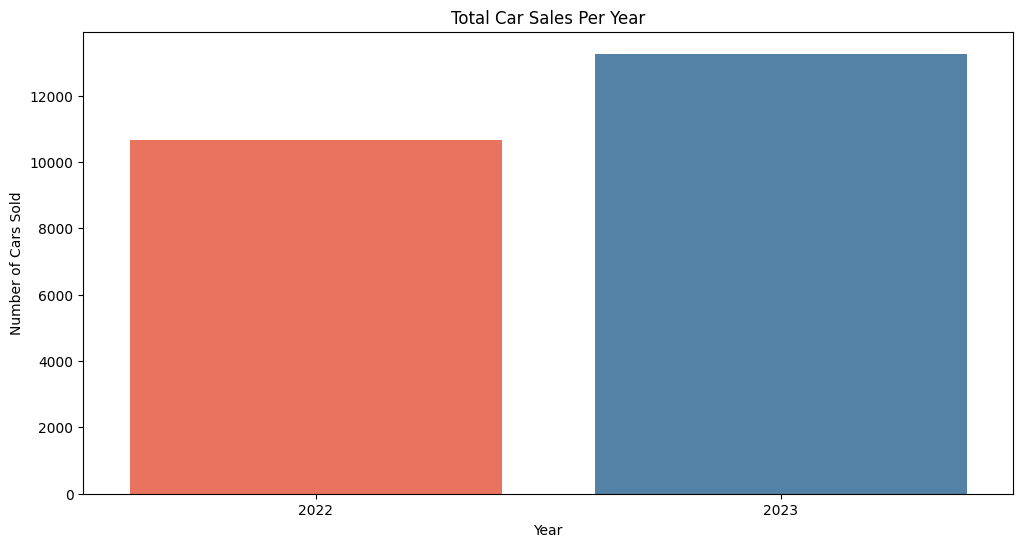

In [194]:
df_avg_sales = df.groupby('year')['car_id'].count().reset_index()

# Sort by highest sales
region_sales = df_avg_sales.sort_values(by="car_id", ascending=False)

# Plot Top Spending Regions
custom_palette = ['#FF6347', '#4682B4']
plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x="year", y="car_id", palette=custom_palette)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Cars Sold")
plt.title("Total Car Sales Per Year")

# Show plot
plt.show()

/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/695137050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sales['year'].astype(str), y=df_sales['price ($)'], palette=custom_palette)


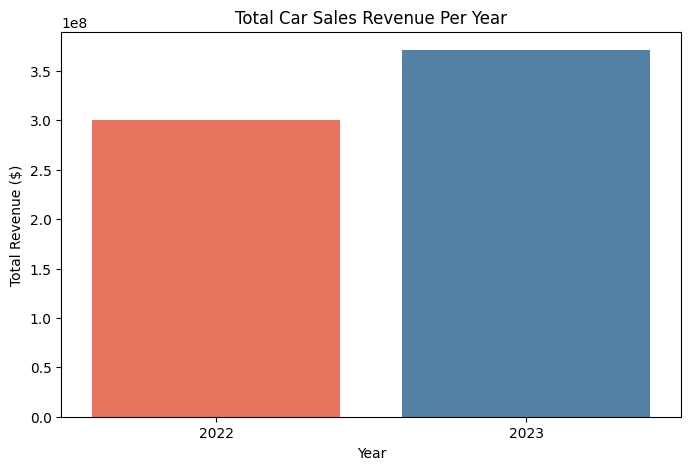

In [200]:
# Group and aggregate data
df_sales = df.groupby('year')['price ($)'].sum().reset_index()

# Plot
custom_palette = ['#FF6347', '#4682B4']
plt.figure(figsize=(8, 5))
sns.barplot(x=df_sales['year'].astype(str), y=df_sales['price ($)'], palette=custom_palette)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Revenue ($)")
plt.title("Total Car Sales Revenue Per Year")


# Show plot
plt.show()

/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/3680051584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_avg_sales['year'].astype(str), y=df_avg_sales['price ($)'], palette=custom_palette)


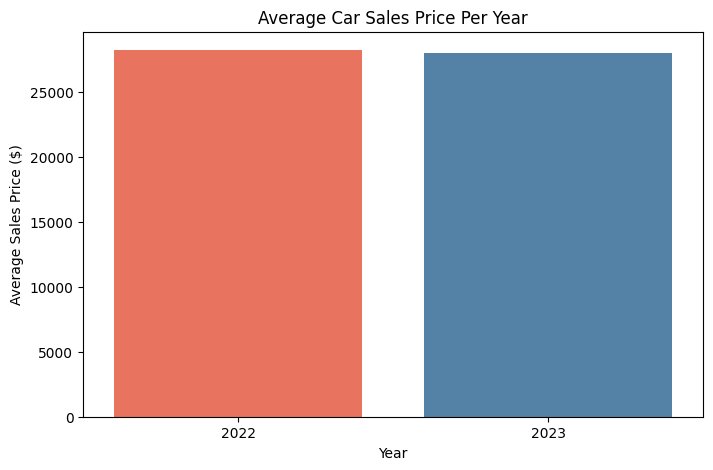

In [196]:
df_avg_sales = df.groupby('year')['price ($)'].mean().reset_index()

# Plot
custom_palette = ['#FF6347', '#4682B4']
plt.figure(figsize=(8, 5))
sns.barplot(x=df_avg_sales['year'].astype(str), y=df_avg_sales['price ($)'], palette=custom_palette)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Sales Price ($)")
plt.title("Average Car Sales Price Per Year")

# Show plot
plt.show()

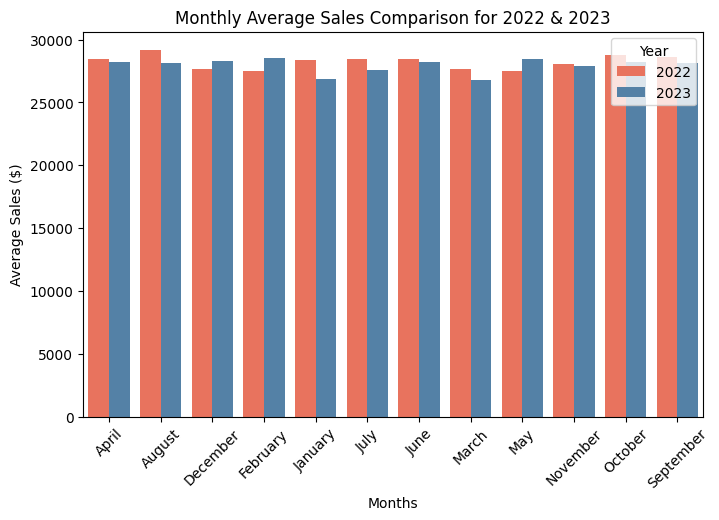

In [197]:
# Pivot table to restructure data for stacked bar chart
# pivot_df = df.pivot_table(values='price ($)', index='month_name', columns='year', aggfunc='sum')
df_monthly_sales = df.groupby(['year', 'month_name'])['price ($)'].mean().reset_index()

# Sorting months correctly
pivot_df = df_monthly_sales.reindex(calendar.month_name[1:])  # Ensures months are in correct order

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(8, 5))
# pivot_df.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
sns.barplot(data=df_monthly_sales, x='month_name', y='price ($)', hue='year', palette=custom_palette)

# Labels and title
plt.xlabel("Months")
plt.ylabel("Average Sales ($)")
plt.title("Monthly Average Sales Comparison for 2022 & 2023")
plt.xticks(rotation=45)
plt.legend(title="Year")

plt.show()

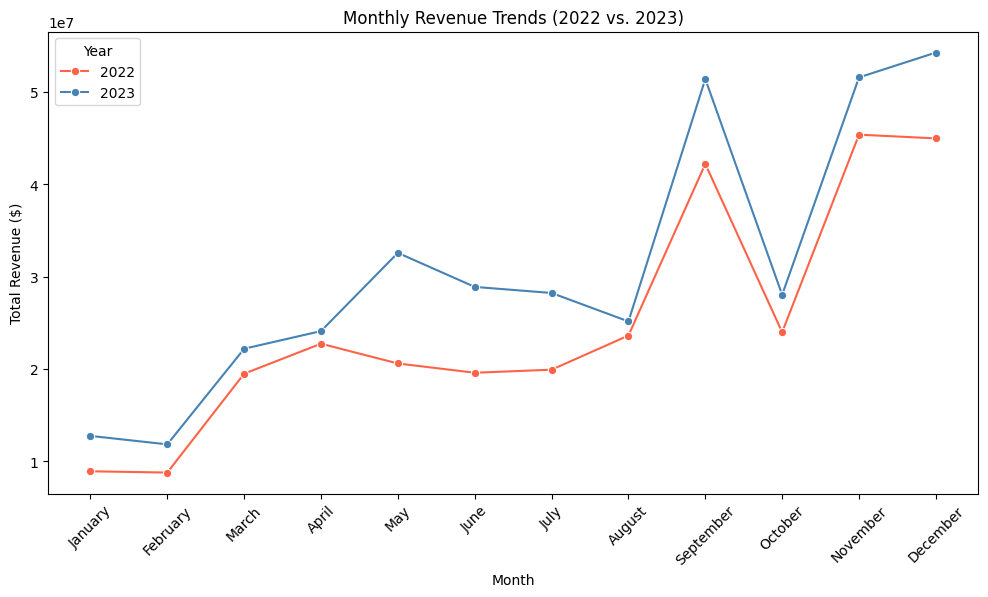

In [198]:
# Aggregate data by year and month
monthly_revenue = df.groupby(['year', 'month_name'])['price ($)'].sum().reset_index()

# Sort month_name in correct order
monthly_revenue['month'] = monthly_revenue['month_name'].apply(lambda x: list(calendar.month_name).index(x))
monthly_revenue = monthly_revenue.sort_values(['year', 'month'])

# Plot the line chart
custom_palette = ['#FF6347', '#4682B4']
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month_name', y='price ($)', hue='year', marker='o', palette=custom_palette)

# Labels and title
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trends (2022 vs. 2023)")
plt.xticks(rotation=45)
plt.legend(title="Year")

# Show plot
plt.show()

In [199]:
# Aggregate data: Total Revenue & Units Sold per year
sales_summary = df.groupby('year').agg(
    total_revenue=('price ($)', 'sum'),
    total_units_sold=('price ($)', 'count')
).reset_index()

# YoY Growth (%)
sales_summary['revenue_growth'] = sales_summary['total_revenue'].pct_change() * 100
sales_summary['units_sold_growth'] = sales_summary['total_units_sold'].pct_change() * 100

print(sales_summary)

   year  total_revenue  total_units_sold  revenue_growth  units_sold_growth
0  2022      300340345             10645             NaN                NaN
1  2023      371159119             13260       23.579507          24.565524


## 2. Customer Demographics & Buying Behaviour

#### Gender-Based Analysis: Do Men or Women Buy More Cars?
- Based on the data, men consistently purchase more cars than women across both 2022 and 2023.
- The most preferred car models among men include Chevrolet, Dodge, and Ford, whereas women also purchase these models but in significantly lower numbers.
- The average price spent on cars by both genders is relatively similar, suggesting that purchasing power and preferences are not drastically different between men and women.

#### Annual Income vs. Purchase Price: How Does Income Influence Purchasing Behavior?
- The data suggests that high-income earners are more likely to purchase vehicles at the upper price range.
- Most of the data points are concentrated in the lower-to-middle-income range, indicating that car affordability remains a crucial factor in purchasing decisions.
- There is no strict correlation where higher income directly translates to purchasing the most expensive cars. Some mid-income earners also buy high-end cars.
  
  - Low-income buyers purchased a diverse range of brands but tended toward more affordable models.
  - Middle-income buyers accounted for the highest number of car purchases.
  - High-income buyers preferred premium brands but purchased fewer cars overall.

#### High-Income vs. Low-Income Customers: What Models Do They Prefer?
- Middle-income buyers dominate car purchases across all models.
- Chevrolet, Dodge, and Ford are among the most preferred brands across all income levels.
- Luxury brands like Mercedes-Benz, BMW, and Cadillac are preferred more by high-income individuals, while more budget-friendly brands such as Toyota and Mitsubishi appeal more to lower-income groups.
- Low-income customers show relatively equal preference across different models but generally purchase fewer units than middle and high-income groups.

#### Top Customer Segments: Which Demographic Spends the Most?
- The average annual income of male buyers was slightly higher than that of female buyers in both years, with males spending more on average on car purchases.
- The dealer regions with the highest car demand were Austin, Janesville, and Scottsdale, where male customers dominated purchases.

  
#### Key Takeaways
- Men purchase significantly more cars than women, but both genders spend similar amounts on average per vehicle.
- Income level influences car choice, with high-income earners leaning towards premium brands and low-income customers preferring budget-friendly options.
- Middle-income earners are the dominant purchasing group across all car models.
- Despite income differences, car purchase decisions vary widely within income brackets, indicating that personal preferences, financing options, and lifestyle considerations play a major role.

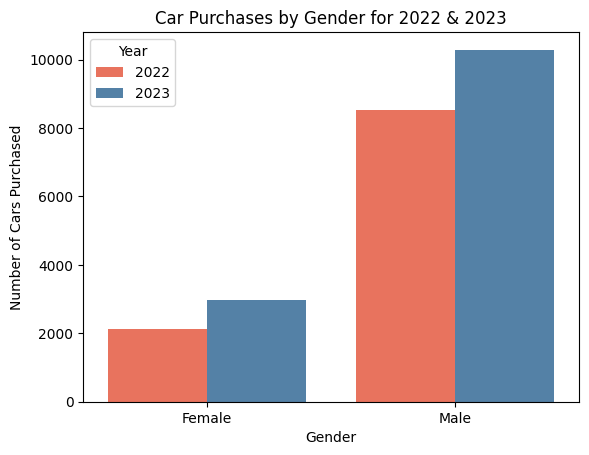

In [99]:
df_gender = df.groupby(['year', 'gender'])['car_id'].count().reset_index()

sns.barplot(x='gender', y='car_id', hue='year', data=df_gender, palette=custom_palette)

# Labels & Title
plt.xlabel("Gender")
plt.ylabel("Number of Cars Purchased")
plt.title("Car Purchases by Gender for 2022 & 2023")
plt.legend(title="Year")

plt.show()

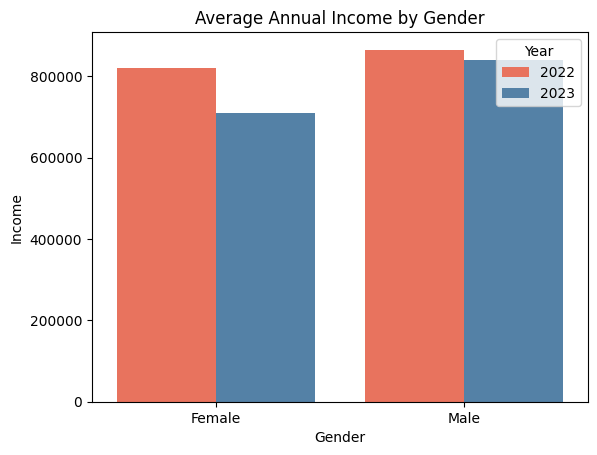

In [97]:
df_gender_models = df.groupby(['year', 'gender'])['annual income'].mean().reset_index()

sns.barplot(data = df_gender_models, x = 'gender', y = 'annual income', hue='year', palette=custom_palette)

#Labels and Titles
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title("Average Annual Income by Gender")
plt.legend(title = 'Year')

plt.show()

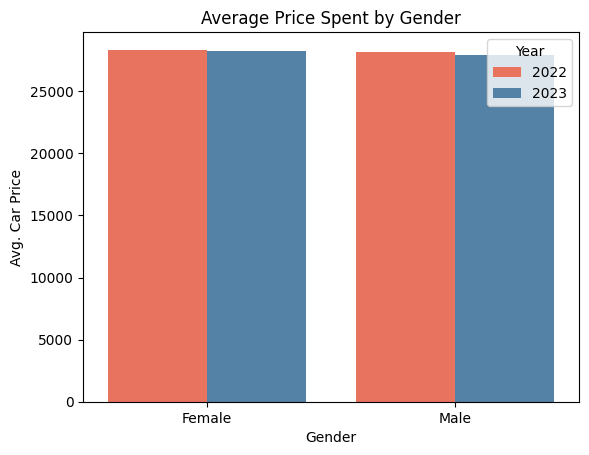

In [101]:
df_gender_car_price = df.groupby(['year', 'gender'])['price ($)'].mean().reset_index()

sns.barplot(data = df_gender_car_price, x = 'gender', y = 'price ($)', hue='year', palette=custom_palette)

plt.xlabel('Gender')
plt.ylabel('Avg. Car Price')
plt.title('Average Price Spent by Gender')
plt.legend(title='Year')

plt.show()

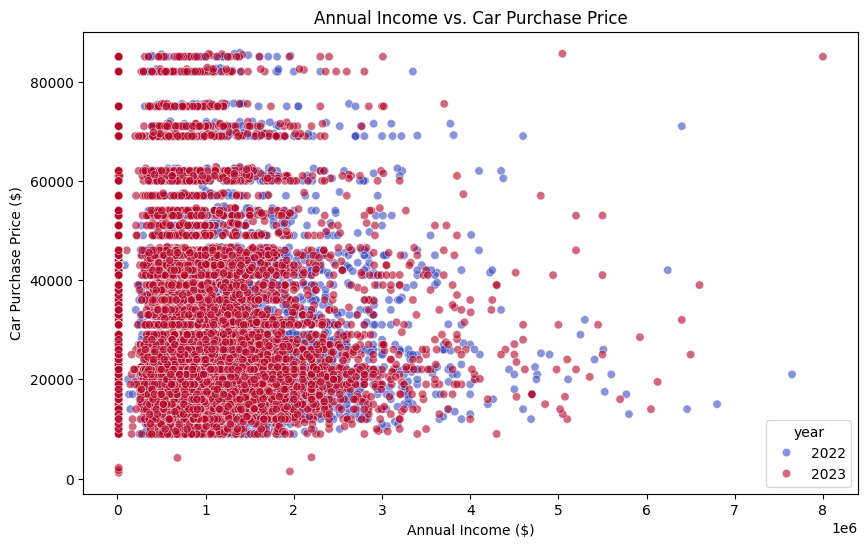

In [108]:
# Plot Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['annual income'], y=df['price ($)'], hue=df['year'], alpha=0.6, palette="coolwarm")

# Labels & Title
plt.xlabel("Annual Income ($)")
plt.ylabel("Car Purchase Price ($)")
plt.title("Annual Income vs. Car Purchase Price")

# Show Plot
plt.show()

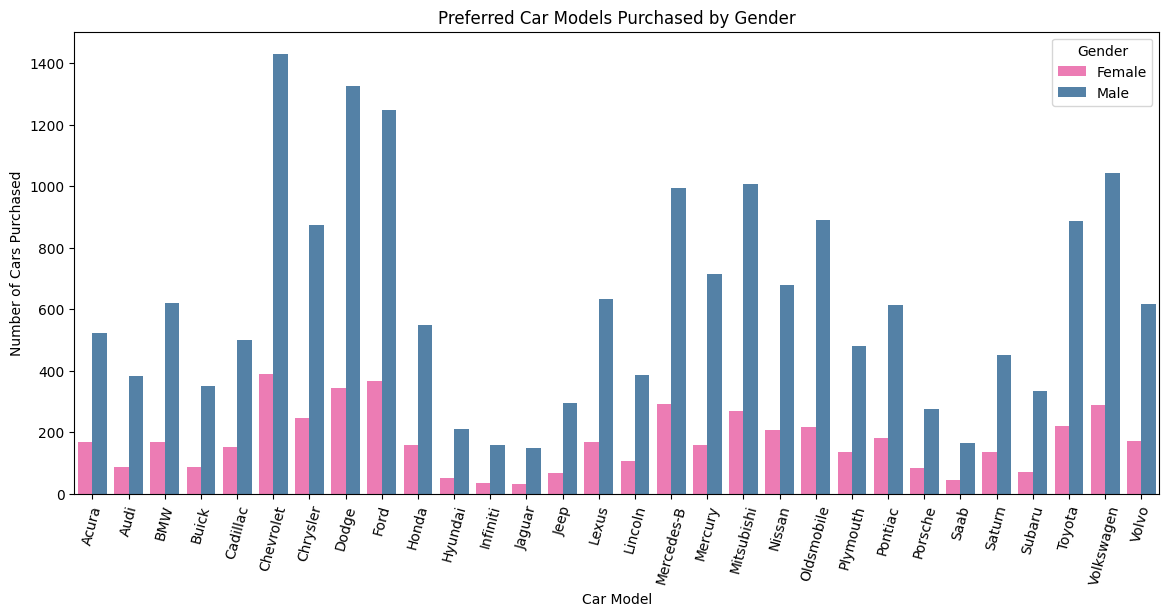

In [144]:
# Group by Year, Gender, and Model
df_company_gender = df.groupby(['gender', 'company'])['car_id'].count().reset_index()

# Pivot for better visualization
df_pivot = df_company_gender.pivot_table(index=['company', 'gender'], values='car_id', fill_value=0).reset_index()

# Reshape Data for Seaborn
df_melted = df_pivot.melt(id_vars=['company', 'gender'], value_name="count")

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='company', y='count', hue='gender', palette=['#FF69B4', '#4682B4'])

# Labels & Title
plt.xlabel("Car Model")
plt.ylabel("Number of Cars Purchased")
plt.title("Preferred Car Models Purchased by Gender")
plt.xticks(rotation=75)
plt.legend(title="Gender")
plt.show()

/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/1336464347.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_income_model = df.groupby(["income_category", "company"])["car_id"].count().reset_index()


<Figure size 1400x600 with 0 Axes>

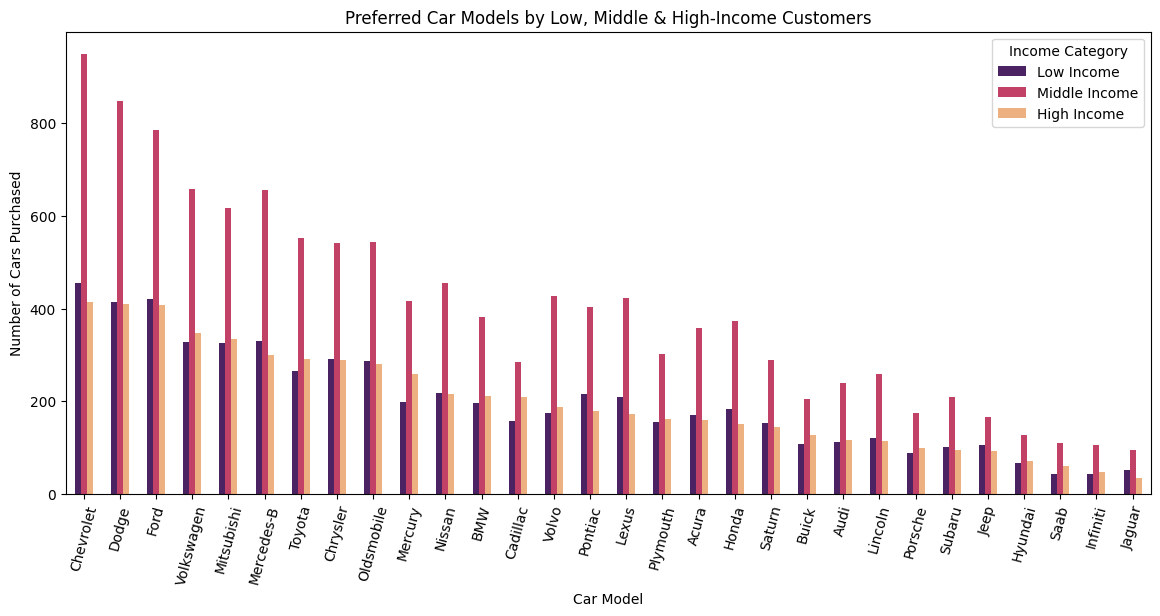

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define income quantiles
low_income_threshold = df["annual income"].quantile(0.25)  # Bottom 25%
middle_income_threshold = df["annual income"].quantile(0.75)  # Top 75%
high_income_threshold = df["annual income"].max()  # Maximum income

# Categorize customers
df["income_category"] = pd.cut(
    df["annual income"],
    bins=[df["annual income"].min(), low_income_threshold, middle_income_threshold, high_income_threshold],
    labels=["Low Income", "Middle Income", "High Income"],
    include_lowest=True
)

# Group data by car model and income category
df_income_model = df.groupby(["income_category", "company"])["car_id"].count().reset_index()

# Pivot the data for better visualization
df_pivot = df_income_model.pivot(index="company", columns="income_category", values="car_id").fillna(0)

# Sort by total sales for better visualization
df_pivot = df_pivot.sort_values(by=["High Income", "Middle Income", "Low Income"], ascending=False)

# Plot
plt.figure(figsize=(14, 6))
df_pivot.plot(kind="bar", stacked=False, colormap="flare_r", figsize=(14, 6))

# Labels & Title
plt.xlabel("Car Model")
plt.ylabel("Number of Cars Purchased")
plt.title("Preferred Car Models by Low, Middle & High-Income Customers")
plt.xticks(rotation=75)
plt.legend(title="Income Category")
plt.show()


/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/1529458677.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x="dealer_region", y="car_id", palette=custom_palette)
/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/1529458677.py:9: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=region_sales, x="dealer_region", y="car_id", palette=custom_palette)


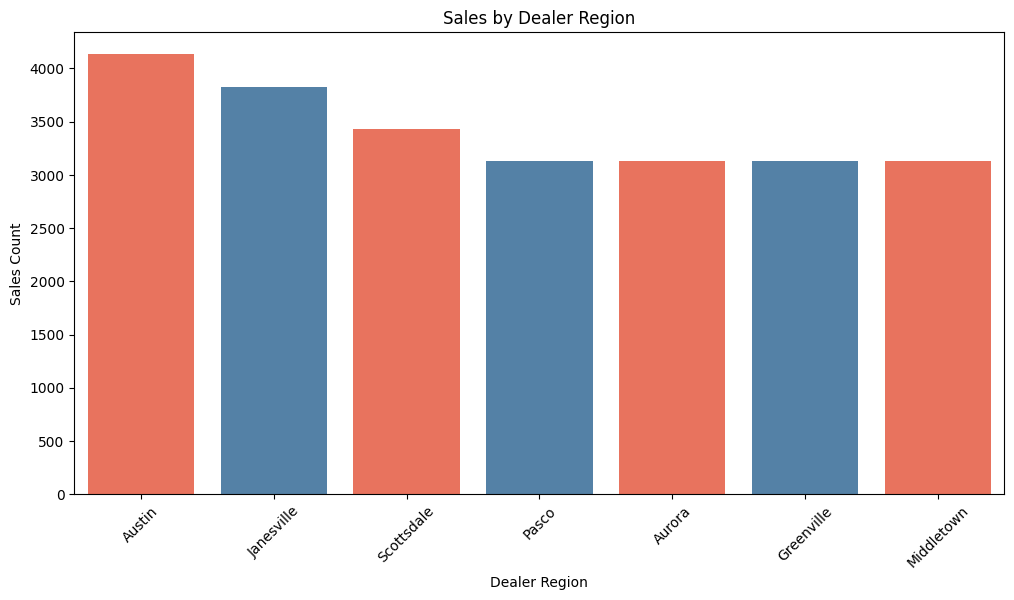

In [154]:
# Group by dealer_region and sum the total sales
region_sales = df.groupby("dealer_region")["car_id"].count().reset_index()

# Sort by highest sales
region_sales = region_sales.sort_values(by="car_id", ascending=False)

# Plot Top Spending Regions
plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x="dealer_region", y="car_id", palette=custom_palette)

# Labels & Title
plt.xlabel("Dealer Region")
plt.ylabel("Sales Count")
plt.title("Sales by Dealer Region")
plt.xticks(rotation=45)
plt.show()

## 3. Dealer & Regional Performance

#### Top-Performing Dealers

- The top dealers in sales volume were Progressive Shippers Cooperative Association, Rabun Used Car Sales, and Race Car Help.
- The highest revenue-generating dealers were Rabun Used Car Sales, Progressive Shippers Cooperative Association, and U-Haul CO, demonstrating a strong ability to sell high-value vehicles.

#### Regional Sales Breakdown

- The highest number of cars were sold in Austin, Janesville, and Scottsdale, which also saw the highest male customer presence.
- In contrast, regions like Aurora and Greenville had relatively lower sales counts.
- Men consistently made more purchases than women across all dealer regions.

#### Dealer Revenue Analysis

- The top 10 dealers contributed significantly to overall revenue, with the likes of Surburban Ford, Rabun Used Car Sales, and Progressive Shippers Corporative Association  consistently performing well in both 2022 and 2023.
- Annual revenue trends for top dealers indicate that almost all major dealers experienced an increase in revenue from 2022 to 2023, reinforcing the positive YoY growth.

#### Summary of Key Takeaways
- Steady Growth in Car Sales: Both revenue and units sold increased in 2023 compared to 2022.
- End-of-Year Sales Surge: August, November, and December consistently outperformed other months.
- Men are Dominant Buyers: Male customers purchased more cars, and their numbers increased in 2023.
- Income Influences Buying Behavior: High-income customers purchased luxury brands, while middle-income buyers had the highest volume.
- Regional Sales Variability: Certain regions, such as Austin and Janesville, saw significantly higher sales.
- Top Dealers are Consistent Performers: The leading dealerships contributed substantially to both revenue and units sold.

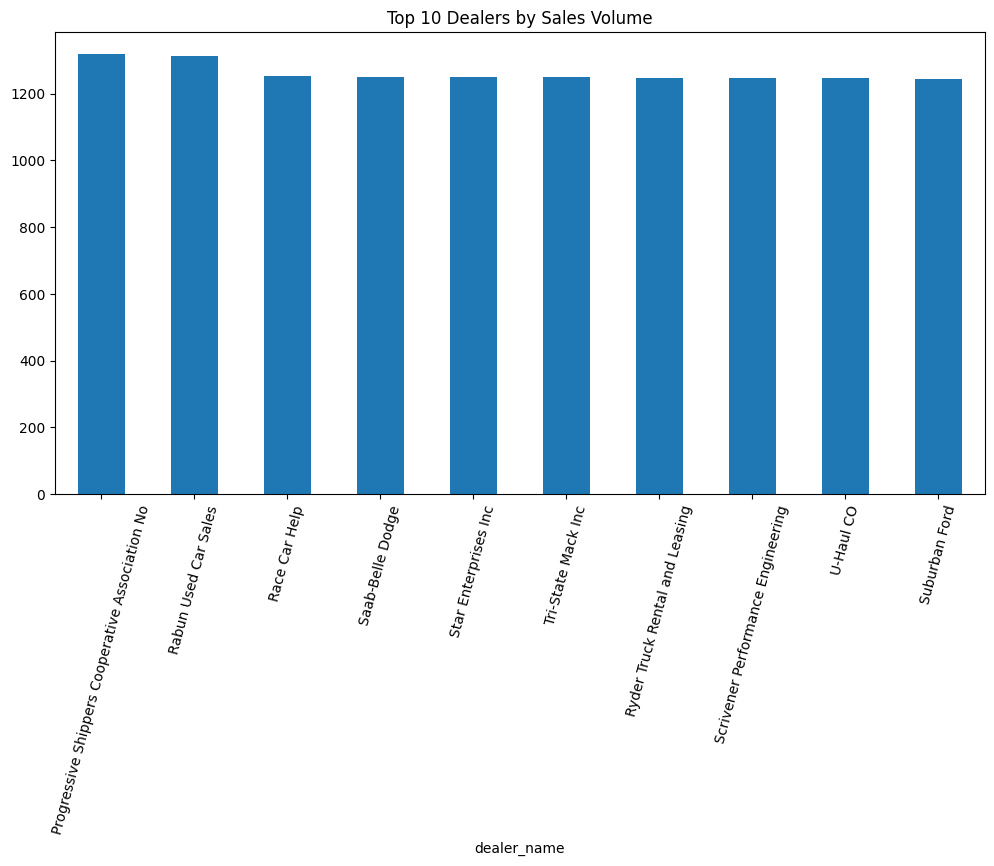

In [159]:
top_10_dealers = df.groupby('dealer_name')['car_id'].count().nlargest(10)
plt.figure(figsize=(12, 6))
top_10_dealers.plot(kind='bar')
plt.title('Top 10 Dealers by Sales Volume')
plt.xticks(rotation=75)
plt.show()

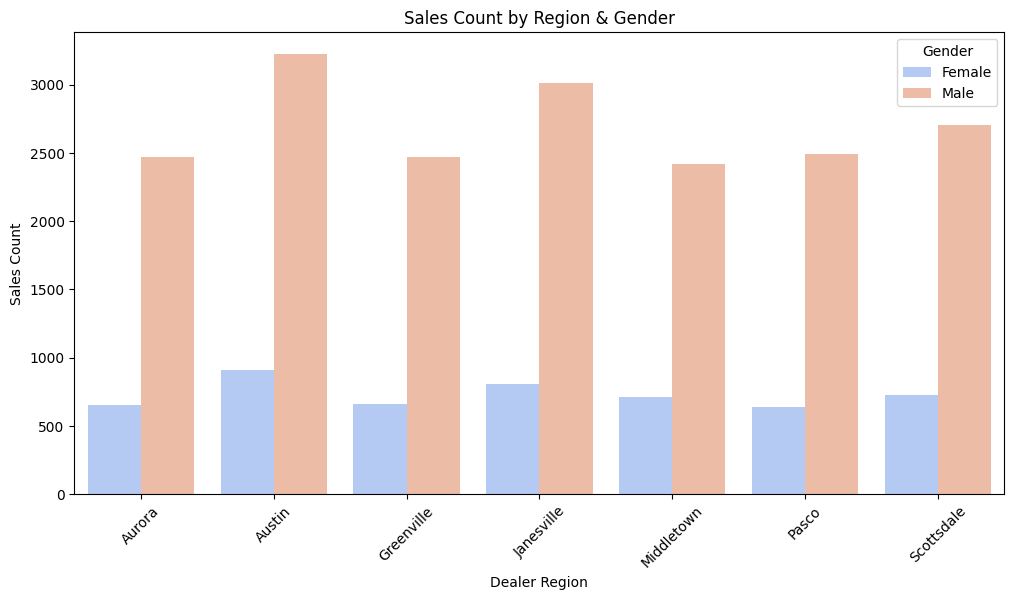

In [157]:
# Group by region & gender
region_gender_sales = df.groupby(["dealer_region", "gender"])["car_id"].count().reset_index()

# Plot a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=region_gender_sales, x="dealer_region", y="car_id", hue="gender", palette="coolwarm")

# Labels & Title
plt.xlabel("Dealer Region")
plt.ylabel("Sales Count")
plt.title("Sales Count by Region & Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/291758346.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dealer_revenue.head(10), x="price ($)", y="dealer_name", palette="coolwarm")


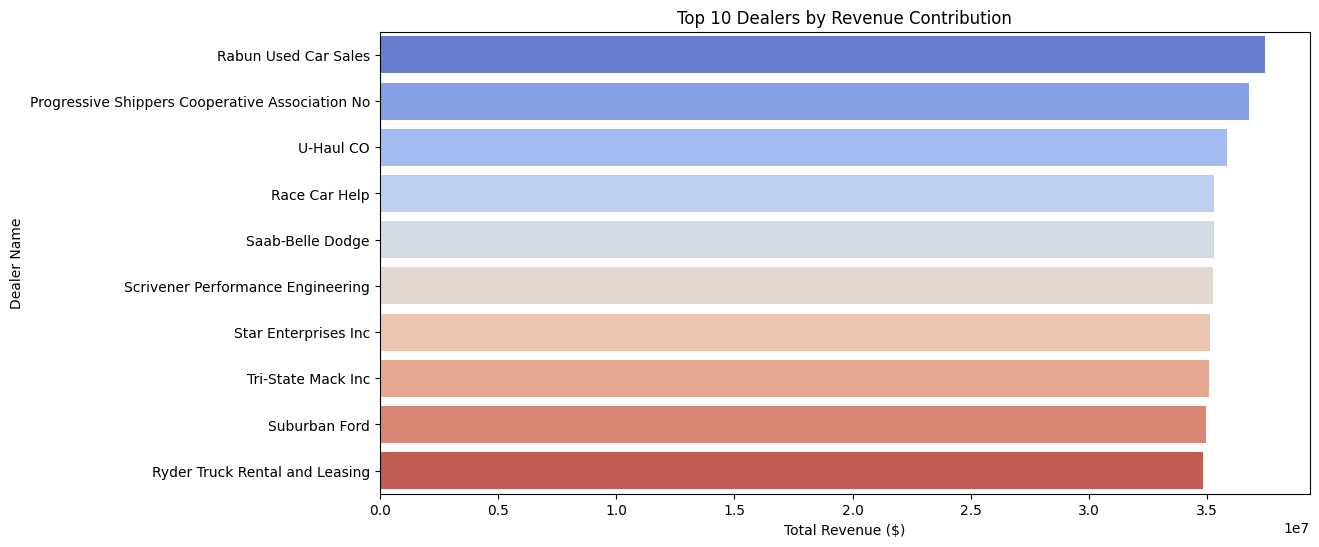

In [160]:
# Group by dealer_name and sum total sales
dealer_revenue = df.groupby("dealer_name")["price ($)"].sum().reset_index()

# Sort by highest revenue
dealer_revenue = dealer_revenue.sort_values(by="price ($)", ascending=False)

# Plot the top 10 highest revenue-generating dealers
plt.figure(figsize=(12, 6))
sns.barplot(data=dealer_revenue.head(10), x="price ($)", y="dealer_name", palette="coolwarm")

# Labels & Title
plt.xlabel("Total Revenue ($)")
plt.ylabel("Dealer Name")
plt.title("Top 10 Dealers by Revenue Contribution")
plt.show()

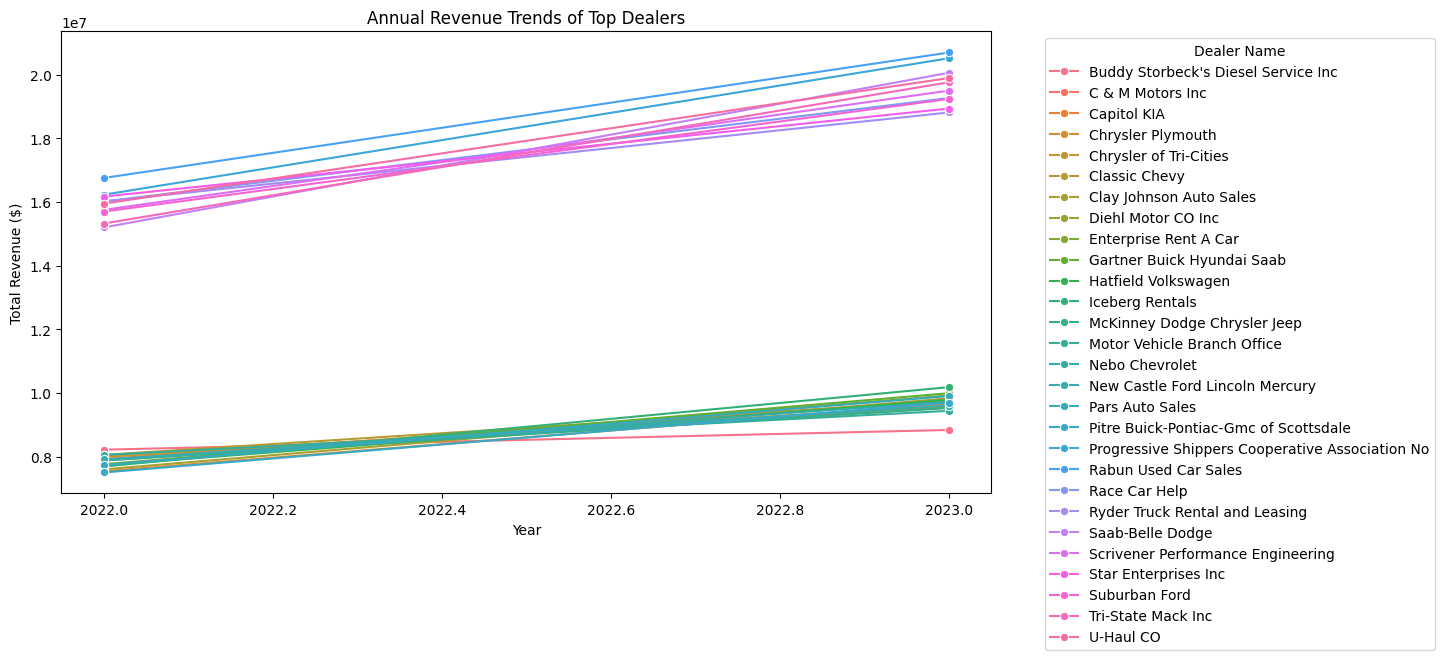

In [161]:
# Group by dealer_name & year for a trend analysis
dealer_yearly_revenue = df.groupby(["dealer_name", "year"])["price ($)"].sum().reset_index()

# Plot revenue trends per dealer
plt.figure(figsize=(12, 6))
sns.lineplot(data=dealer_yearly_revenue, x="year", y="price ($)", hue="dealer_name", marker="o")

# Labels & Title
plt.xlabel("Year")
plt.ylabel("Total Revenue ($)")
plt.title("Annual Revenue Trends of Top Dealers")
plt.legend(title="Dealer Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## 4. Car Model & Brand Performance

#### Best-Selling Models

- The top 10 best-selling models included A6, LHS, LS400, RL, and Jetta.
- Chevrolet was the most dominant brand, followed by Dodge, Ford, and Volkswagen.

#### Most Preferred Car Brands

- Chevrolet, Dodge, Ford, and Volkswagen led in total car sales.
- Premium brands like Mercedes-Benz and Toyota also had a strong presence.

#### Car Pricing Trends

- The most expensive car models included Catera, DeVille, and Contour.
- The highest-priced brands were Cadillac, Saab, and Lexus, while Hyundai and Jeep had the lowest average prices.

#### Transmission Type Preference

- Automatic cars (52.6%) were slightly more popular than manual cars (47.4%), showing a nearly even preference split.


/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/796162177.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_models, x="cars_sold", y="model", palette="viridis")


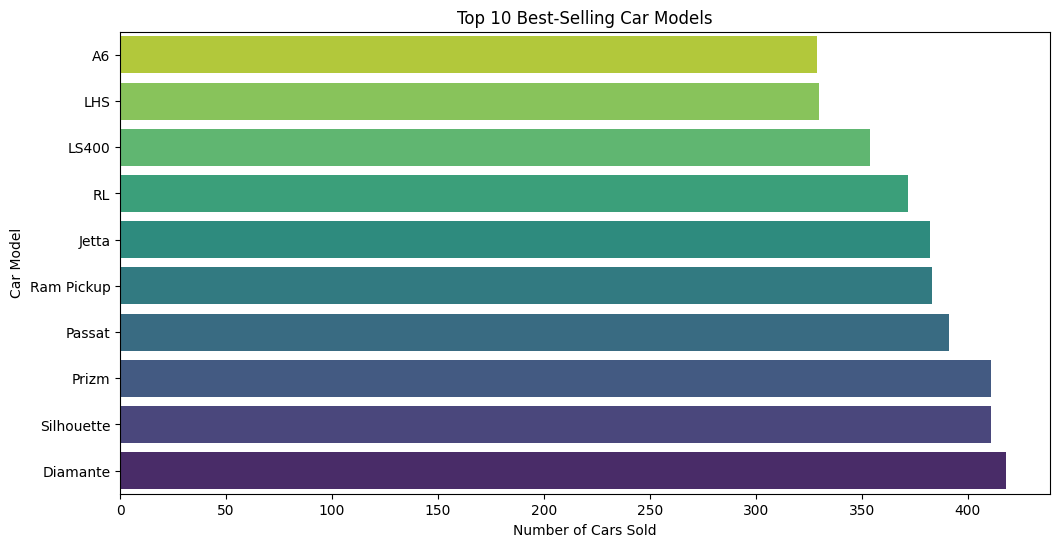

In [164]:
# Group by car model and count the number of cars sold
top_models = df["model"].value_counts().reset_index()
top_models.columns = ["model", "cars_sold"]

# Select top 10 best-selling models
top_models = top_models.head(10)

# Plot top-selling car models
plt.figure(figsize=(12, 6))
sns.barplot(data=top_models, x="cars_sold", y="model", palette="viridis")

# Labels & Title
plt.xlabel("Number of Cars Sold")
plt.ylabel("Car Model")
plt.title("Top 10 Best-Selling Car Models")
plt.gca().invert_yaxis()  # Invert so highest-selling is on top

plt.show()


/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/603628049.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, x="cars_sold", y="company", palette="magma")


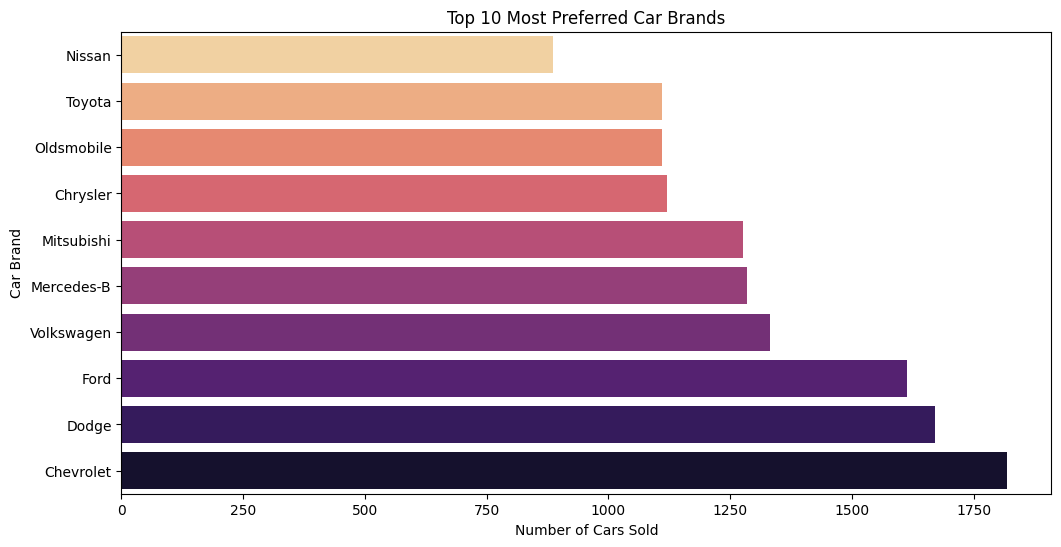

In [166]:
# Group by car brand (company column) and count the number of cars sold
top_brands = df["company"].value_counts().reset_index()
top_brands.columns = ["company", "cars_sold"]

# Select top 10 brands
top_brands = top_brands.head(10)

# Plot most preferred car brands
plt.figure(figsize=(12, 6))
sns.barplot(data=top_brands, x="cars_sold", y="company", palette="magma")

# Labels & Title
plt.xlabel("Number of Cars Sold")
plt.ylabel("Car Brand")
plt.title("Top 10 Most Preferred Car Brands")
plt.gca().invert_yaxis()  # Invert so highest-selling is on top

plt.show()

/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/2695445850.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_prices, x="price ($)", y="company", palette="coolwarm")


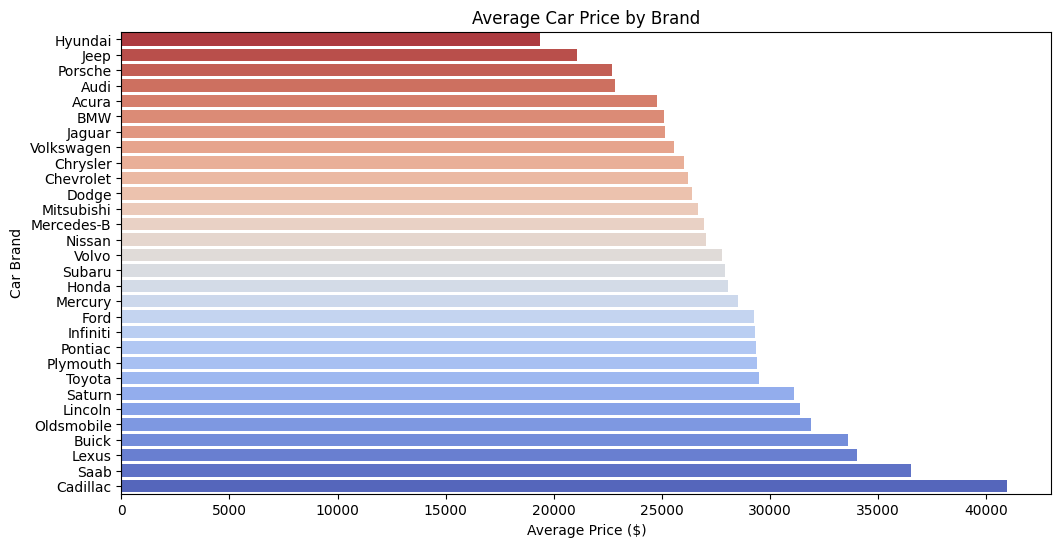

In [167]:
# Group by car brand (company column) and compute average price
brand_prices = df.groupby("company")["price ($)"].mean().reset_index()
brand_prices = brand_prices.sort_values(by="price ($)", ascending=False)

# Plot: Average car price by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_prices, x="price ($)", y="company", palette="coolwarm")

# Labels & Title
plt.xlabel("Average Price ($)")
plt.ylabel("Car Brand")
plt.title("Average Car Price by Brand")
plt.gca().invert_yaxis()  # Highest-priced brands at the top

plt.show()

/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_52079/2085943585.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_prices, x="price ($)", y="model", palette="viridis")


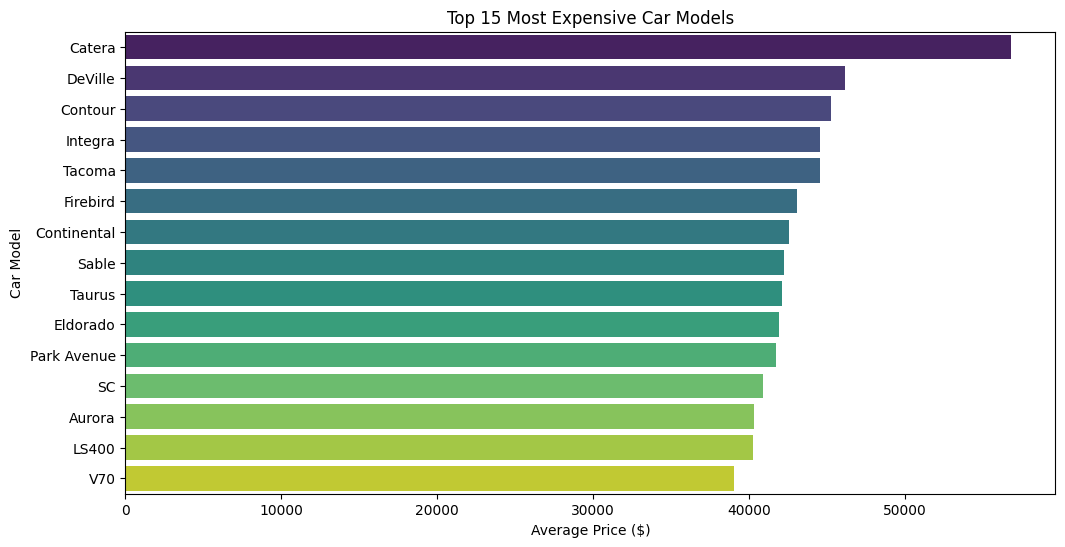

In [168]:
# Group by car model and compute average price
model_prices = df.groupby("model")["price ($)"].mean().reset_index()
model_prices = model_prices.sort_values(by="price ($)", ascending=False).head(15)

# Plot: Average price of top 15 car models
plt.figure(figsize=(12, 6))
sns.barplot(data=model_prices, x="price ($)", y="model", palette="viridis")

# Labels & Title
plt.xlabel("Average Price ($)")
plt.ylabel("Car Model")
plt.title("Top 15 Most Expensive Car Models")

plt.show()

## 5. Car Preferences Summary

#### Transmission Preference

- 52.6% of buyers preferred automatic transmissions, while 47.4% opted for manual.

#### Body Style Preference

- SUVs (26.7%) and Hatchbacks (25.6%) were the most popular, while Hardtops had the lowest demand (12.4%).

#### Color Preference

- Pale White (47.1%) was the most popular car color, followed by Black (32.9%) and Red (20.1%).

#### Engine Preference

- Double Overhead Camshaft engines were slightly more popular (52.6%) than Overhead Camshaft engines (47.4%).

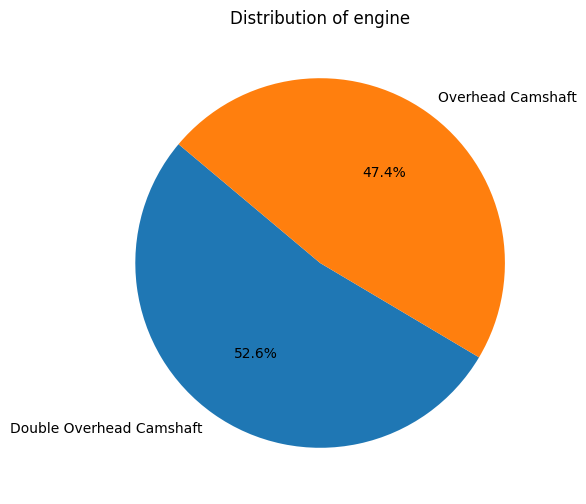

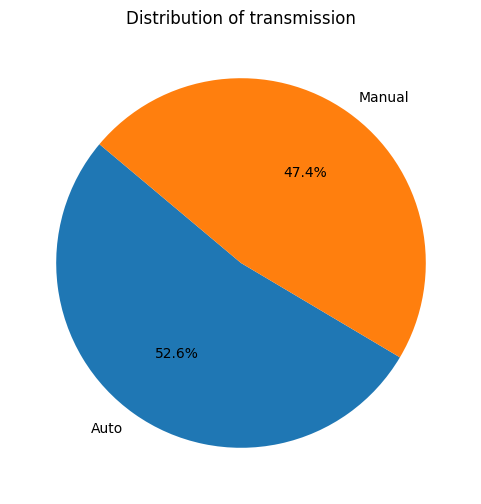

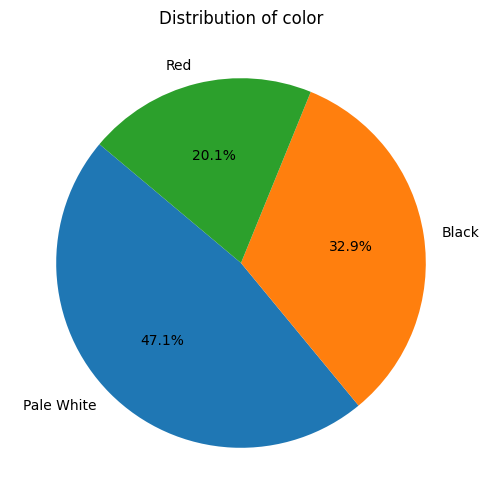

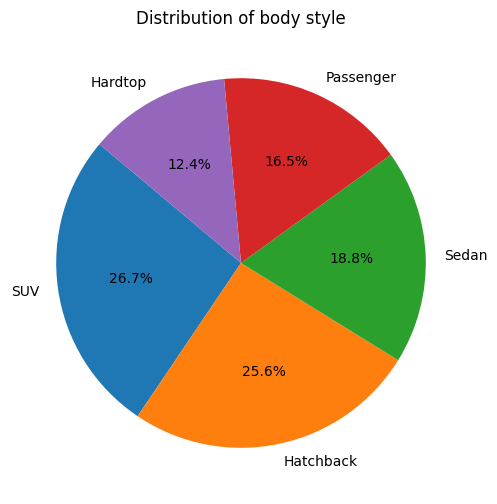

In [179]:
features = ['engine', 'transmission', 'color', 'body style']

for col in features:
    # Get value counts
    counts = df[col].value_counts()

    # Plot pie chart
    plt.figure(figsize=(6, 6))  
    plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)

    # Set title
    plt.title(f'Distribution of {col}')

    # Show the chart
    plt.show()


## Summary

#### Sales Performance Analysis

- Sales volume and revenue increased significantly from 2022 to 2023.
- September, October, and December were peak months for sales.
- January and February were the weakest months, potentially due to seasonal factors.
- The YoY increase in both revenue and units sold suggests successful sales strategies, growing consumer demand, or effective dealership operations.

#### Customer Demographics & Buying Behaviour

- Men purchase significantly more cars than women, but both genders spend similar amounts on average per vehicle.
- Income level influences car choice, with high-income earners leaning towards premium brands and low-income customers preferring budget-friendly options.
- Middle-income earners are the dominant purchasing group across all car models.
- Despite income differences, car purchase decisions vary widely within income brackets, indicating that personal preferences, financing options, and lifestyle considerations play a major role.

#### Dealer & Regional Performance

- Steady Growth in Car Sales: Both revenue and units sold increased in 2023 compared to 2022.
- End-of-Year Sales Surge: August, November, and December consistently outperformed other months.
- Men are Dominant Buyers: Male customers purchased more cars, and their numbers increased in 2023.
- Income Influences Buying Behavior: High-income customers purchased luxury brands, while middle-income buyers had the highest volume.
- Regional Sales Variability: Certain regions, such as Austin and Janesville, saw significantly higher sales.
- Top Dealers are Consistent Performers: The leading dealerships contributed substantially to both revenue and units sold.

#### Car Model & Brand Performance

- Top best selling models include A6, LHS, LS400, RL, and Jetta.
- Chevrolet was the is most dominant brand, followed by Dodge, Ford, and Volkswagen. These also led in total car sales.
- The most expensive cars include Cetera, DeVille and Contour.
- Highest priced brands include Cadillac, Saab, and Lexus. Hyundai and Jeep had the lowest average prices.

#### Car Preferences Summary

- 52.6% of buyers preferred automatic transmissions, while 47.4% opted for manual.
- SUVs (26.7%) and Hatchbacks (25.6%) were the most popular, while Hardtops had the lowest demand (12.4%).
- Pale White (47.1%) was the most popular car color, followed by Black (32.9%) and Red (20.1%).
- Double Overhead Camshaft engines were slightly more popular (52.6%) than Overhead Camshaft engines (47.4%).


### Recommendations

- Increase marketing campaigns, discounts, and promotional offers during peak months (September, October, December) to maximize revenue.
- Dealers should analyze competitor pricing strategies and consider bundling services (e.g., extended warranties, free servicing) to enhance value.
- To address the regions with low sales, further detailed market research should be conducted to identify barriers to sales (e.g., lack of brand trust, poor inventory selection) and adjust strategies accordingly.
- Strengthen partnerships with top-performing dealers through exclusive inventory, better financing options, and dealer incentives.
- Maintain a balanced mix of automatic and manual cars, ensuring dealerships cater to both segments.